<a href="https://colab.research.google.com/github/arunrajanp/ML-Projects/blob/main/2.%20Calories_Burnt_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

The **goal** of the "Calories Burnt Prediction" project using machine learning is to develop a model that accurately predicts the number of calories a person burns during physical activities



In [6]:
path_Exercise = "/content/drive/MyDrive/Data Science/Used Case/1. Regression /3. Calories Burnt Prediction,  ML/exercise.csv"
path_Calories = "/content/drive/MyDrive/Data Science/Used Case/1. Regression /3. Calories Burnt Prediction,  ML/calories.csv"


In [7]:
dataset_Exercise = pd.read_csv(path_Exercise)
dataset_Calories = pd.read_csv(path_Calories)

In [8]:
dataset_Exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
dataset_Calories.shape

(15000, 2)

In [10]:
# prompt: I want to merge two datasets

dataset = pd.merge(dataset_Exercise, dataset_Calories, on='User_ID')
dataset.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
dataset.duplicated().sum()

0

In [9]:
Numeric_Columns = dataset.select_dtypes(include=np.number).columns
Numeric_Columns

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [10]:
Object_Columns = dataset.select_dtypes(include=object).columns
Object_Columns

Index(['Gender'], dtype='object')

In [11]:
dataset['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [12]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
dataset.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

**Handling Categorical Variables:** : One-Hot Encoding: Convert categorical variables into numerical representations using one-hot encoding

In [14]:
dataset = pd.get_dummies(dataset, columns=['Gender'])

In [15]:
dataset.nunique()

User_ID          15000
Age                 60
Height              90
Weight              91
Duration            30
Heart_Rate          59
Body_Temp           45
Calories           277
Gender_female        2
Gender_male          2
dtype: int64

**Feature Scaling:** Standardization/Normalization: Scale numerical features to a similar range to improve model performance.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['Duration', 'Heart_Rate']] = scaler.fit_transform(dataset[['Duration', 'Heart_Rate']])

In [17]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,2.711905e-17,-4.429050e-16,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,1.000033e+00,1.000033e+00,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,-1.746692e+00,-2.975948e+00,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,-9.052370e-01,-7.845692e-01,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,5.642555e-02,5.024170e-02,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,8.978803e-01,7.807012e-01,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,1.739335e+00,3.389485e+00,41.500000,314.000000


## **Exploratory Data Analysis (EDA):**

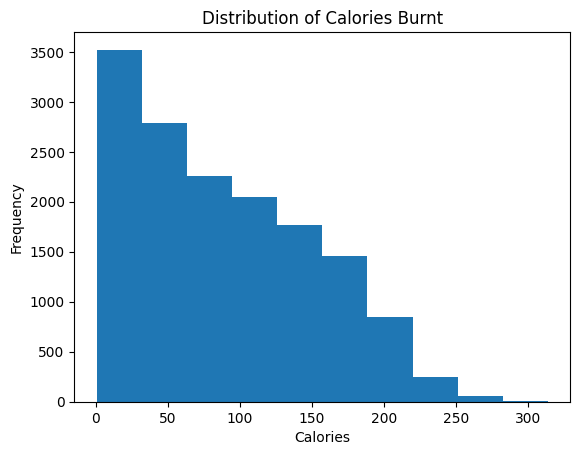

In [18]:
import matplotlib.pyplot as plt
plt.hist(dataset['Calories'])
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories Burnt')
plt.show()

In [19]:
# **Correlation Analysis:** Analyze the correlation between features and the target variable (Calories) to identify significant relationships.
correlation = dataset.corr()['Calories'].sort_values(ascending=False)
print(correlation)

Calories         1.000000
Duration         0.955421
Heart_Rate       0.897882
Body_Temp        0.824558
Age              0.154395
Weight           0.035481
Gender_male      0.022357
Height           0.017537
User_ID         -0.001661
Gender_female   -0.022357
Name: Calories, dtype: float64


**Feature Selection**

In [20]:

# Select features with a correlation coefficient greater than 0.5
selected_features = correlation[correlation > 0.5].index.tolist()

# Create a new dataset with only the selected features and the target variable
dataset_selected = dataset[selected_features + ['Calories']]

# Display the selected features
print(f"Selected features: {selected_features}")

# Further analysis and modeling can be performed on the new dataset


Selected features: ['Calories', 'Duration', 'Heart_Rate', 'Body_Temp']


# **Split**

In [21]:
from sklearn.model_selection import train_test_split
X = dataset_selected.drop('Calories', axis=1)
y = dataset_selected['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Selection**

In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, r2_score


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    svm.SVR(),
    GradientBoostingRegressor(),
    XGBRegressor(),
]

results = []

for model in models:
    # Select the appropriate target column from y_train
    model.fit(X_train, y_train.iloc[:, 0])  # Use .iloc[:, 0] to select the first column
    y_pred = model.predict(X_test)

    # Clip predicted values to be non-negative
    y_pred_clipped = np.clip(y_pred, a_min=0, a_max=None)

    # Ensure y_test is a 1D array for comparison
    mse = mean_squared_log_error(y_test.iloc[:, 0], y_pred_clipped)  # Select the first column of y_test
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test.iloc[:, 0], y_pred)  # Select the first column of y_test

    results.append({
        'Model': model.__class__.__name__,
        'Mean Squared Log Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by R-squared in descending order
results_df = results_df.sort_values(by='R-squared', ascending=False)  # Set ascending to False

# Display the results in a tabular form
display(results_df)

,Model,Mean Squared Log Error,Root Mean Squared Error,R-squared
3,GradientBoostingRegressor,0.023290,0.152609,0.960966
4,XGBRegressor,0.023444,0.153113,0.957517
0,LinearRegression,0.293930,0.542153,0.946458
1,DecisionTreeRegressor,0.034330,0.185284,0.941766
2,SVR,0.148332,0.385138,0.751382


**LinearRegression**

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [25]:
from sklearn import svm
model = svm.SVR()

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [27]:
from xgboost import XGBRegressor
model = XGBRegressor()

## **Model Training:**

In [28]:
# Assuming 'Calories' is the correct target column and there's a duplicate
y_train = y_train['Calories'].iloc[:, 0]  # Select the first 'Calories' column

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
from sklearn.metrics import mean_squared_log_error

# Ensure y_test is a 1D array for comparison
y_test = y_test['Calories'].iloc[:, 0]  # Select the first 'Calories' column of y_test

y_pred = model.predict(X_test)

# Clip predicted values to be non-negative
y_pred_clipped = np.clip(y_pred, a_min=0, a_max=None)

mse = mean_squared_log_error(y_test, y_pred_clipped)
print(f"Mean squared log error: {mse}")

Mean squared log error: 0.02344357669125096


In [30]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.15311295402823027


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9575173772317531


In [32]:
# create a DataFrame for better visualization (if y_test is a Pandas Series)
comparison_df = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred.ravel()}) # Flatten y_test.values and y_pred to 1D
display(comparison_df.head(10))

,Actual,Predicted
0,173.0,169.295425
1,189.0,214.076721
2,53.0,50.463867
3,161.0,166.028778
4,226.0,238.721069
5,179.0,164.841171
6,98.0,74.445976
7,44.0,41.537556
8,79.0,78.683220
9,59.0,57.395878


-------------------------------------------------------------------------------

--------------------------------

## **Analysis 2**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-12-50c79cf48344>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

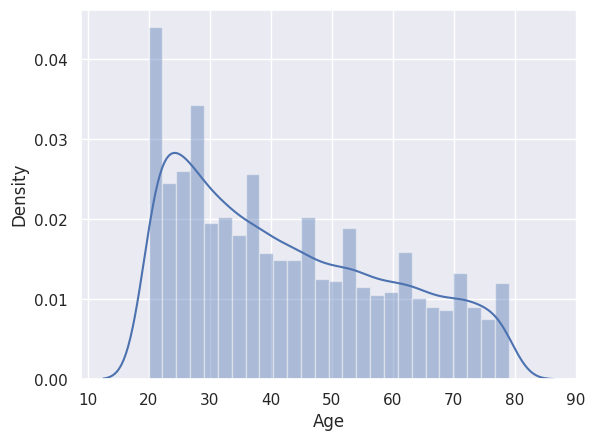

In [12]:
sns.set()
sns.distplot(dataset['Age'])

## **Finding the Correlation in the dataset**

In [13]:
#correlation = dataset.corr() # Correlation matrix

In [14]:
dataset = pd.merge(dataset_Exercise, dataset_Calories, on='User_ID')
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
dataset.replace({'Gender': {'male': 0, 'female': 1}}, inplace=True)
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
dataset['Gender'].nunique()

2

<Axes: >

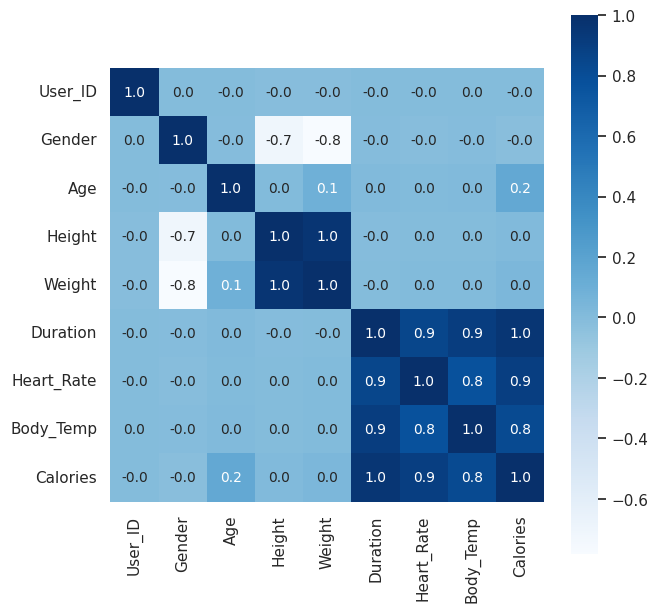

In [17]:
correlation = dataset.corr() # Correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

# **Separating features and Target**

In [18]:
X = dataset.drop(['Calories','User_ID'], axis=1)
y = dataset['Calories']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X.shape,X_train.shape,X_test.shape

((15000, 7), (12000, 7), (3000, 7))

**Model Training**

In [32]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, r2_score
import numpy as np # import numpy for np.clip
import pandas as pd # import pandas for pd.DataFrame

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    svm.SVR(),
    GradientBoostingRegressor(),
    XGBRegressor(),
]

results = []

for model in models:
    # Fit the model using the entire y_train Series
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Clip predicted values to be non-negative
    y_pred_clipped = np.clip(y_pred, a_min=0, a_max=None)

    # Calculate metrics using the entire y_test Series
    mse = mean_squared_log_error(y_test, y_pred_clipped)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model.__class__.__name__,
        'Mean Squared Log Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by R-squared in descending order
results_df = results_df.sort_values(by='R-squared', ascending=False)

# Display the results in a tabular form
display(results_df)



,Model,Mean Squared Log Error,Root Mean Squared Error,R-squared
4,XGBRegressor,0.001729,0.041576,0.998868
3,GradientBoostingRegressor,0.016641,0.129000,0.996767
1,DecisionTreeRegressor,0.005101,0.071419,0.993221
0,LinearRegression,0.343176,0.585812,0.967294
2,SVR,0.185535,0.430737,0.936807


In [33]:
# Import XGBoost Regressor
from xgboost import XGBRegressor
model = XGBRegressor()

In [23]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
y_pred = model.predict(X_test)

## **Model Evaluation:**

**Means Squred Error**

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

4.568956111227719

In [26]:
rsme = np.sqrt(mse)
rsme

2.1375116634132594

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9988678909361673

In [30]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df.head(10))

,Actual,Predicted
11499,173.0,172.076447
6475,189.0,195.785797
13167,53.0,51.708874
862,161.0,162.325150
5970,226.0,225.297104
6706,179.0,177.201263
3017,98.0,101.479004
3781,44.0,44.065922
3898,79.0,80.791534
2250,59.0,59.529823
